In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_array = cv2.imread("happy-boy.jpg")

In [ ]:
img_array.shape

In [ ]:
print(img_array)

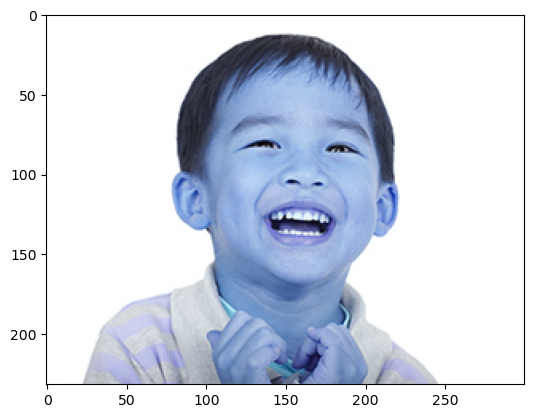

In [72]:
plt.imshow(img_array) 

In [12]:
Datadirectory = "Training/"

In [13]:
Classes = ["0","1","2","3","4","5","6"]

In [14]:
#Datadirectory = "Training/"


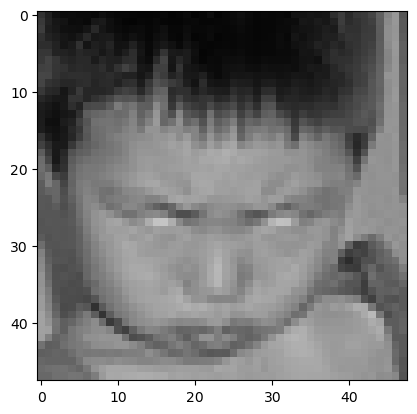

In [15]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break   

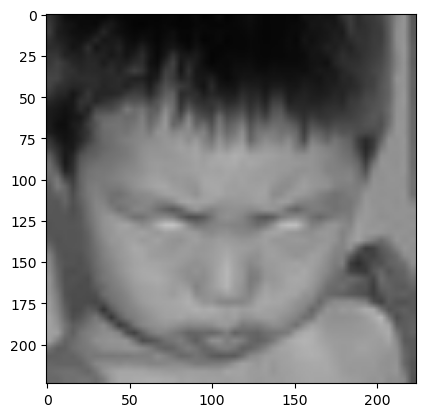

In [16]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
new_array.shape

(224, 224, 3)

In [84]:
training_Data = []

def create_training_Data():
    images = []
    labels = []
    
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                images.append(new_array)
                labels.append(class_num)
            except Exception as e:
                pass
            
    return images, labels 
    

In [85]:
images, labels = create_training_Data()


In [86]:
print(len(training_Data))

0


In [88]:
images_array = np.array(images)
labels_array = np.array(labels)

In [89]:
import random

random.shuffle(training_Data)

In [90]:
X =[]
y= []

for features, label in training_Data:
    X.append(features)
    y.append(label)


x = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

In [ ]:
X= x/255;

In [ ]:
y[0]

In [ ]:
 Y = np.array(y)

In [ ]:
Y.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2()

In [ ]:
model.summary()

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output)

In [ ]:
final_output

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
 new_model.fit(X,Y,epochs = 15)

In [ ]:
new_model.save('Final_model_95p07.h5')

In [ ]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

In [ ]:
frame = cv2.imread("happy-boy.jpg")

In [ ]:
frame.shape

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [92]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [93]:
gray.shape

(232, 300)

In [94]:
  faces = faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (225,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) ==0:
            print("Face not deteccted")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]

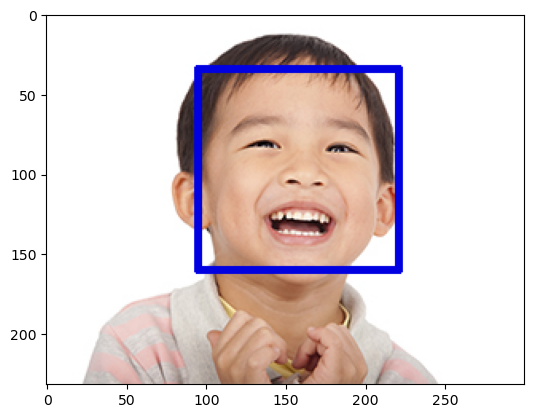

In [95]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

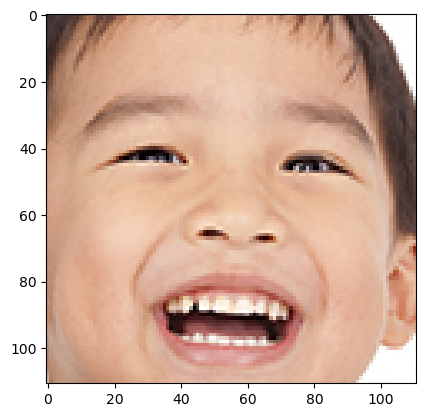

In [96]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [97]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [98]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 522ms/step


In [99]:
Predictions[0]

array([0.06244876, 0.20481534, 0.09994479, 0.3724932 , 0.07332187,
       0.06488583, 0.12209022], dtype=float32)

In [100]:
np.argmax(Predictions)

3

In [ ]:
import cv2
import numpy as np

path = "haarcascade_frontalface_default.xml"

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr= (255,255,255)

img= np.zeros((500,500))

text = "something in box"

(text_width,text_height)= cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x=10
text_offset_y = img.shape[0]-25

box_coords = ((text_offset_x,text_offset_y),(text_offset_x + text_width +2 , text_offset_y - text_height - 2))

cv2.rectangle(img, box_coords[0],  box_coords[1], rectangle_bgr, cv2.FILLED)

cv2.putText(img, text,(text_offset_x,text_offset_y), font, fontScale=font_scale, color=(0,0,0),thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.isOpened(0)
    
if not cap.isOpened():
    raise IOError("Cannot open WebCam")

while True:
    ret, frame = cap.read()
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
        
for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (225,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        
        if len(facess) ==0:
            print("Face not deteccted")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]
    
        final_image = cv2.resize(face_roi,(224,224))
        final_image = np.expand_dims(final_image,axis = 0)
        final_image = final_image/255.0
    
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        Predictions = new_model.predict(final_image)
    
        font_scale = 1.5
        font = cv2.FONT_HERSHEY_PLAIN
    
        if (np.argmax (Predictions)==0):
            status = "Angry"
            
            x1,y1,w1,h1 = 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1+ int(w1/10), y1+int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
            
        elif (np.argmax (Predictions)==1): 
            status = "Disgust"
            x1,y1,w1,h1 = 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1+ int(w1/10),y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
            
        elif (np.argmax (Predictions) ==2):
            status = "Fear"
            x1,y1, w1,h1= 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ h), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1+int (w1/10),y1+int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            
            cv2.putText(Frame, status, (100, 156), font, 3, (0, 0, 255),2,cv2.LINE_4)
            
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
        elif (np.argmax (Predictions) ==3):
            status = "Happy"
            x1,y1, w1,h1= 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ h), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1+int (w1/10),y1+int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(Frame, status, (100, 156), font, 3, (0, 0, 255),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
        elif (np.argmax (Predictions)==4):
            status = "Sad"
            x1,y1,w1,h1 = 0,0,175,75
            # Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1 + int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
        elif (np.argmax (Predictions) ==5): 
            status = "Surprise"
            x1,y1,w1,h1 = 0,0,175,75
             #Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ hl), (0,0,0), -1)
             # Add text
            cv2.putText(frame, status, (x1+ int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        else: 
            status = "Neutral"
        
            x1,y1,w1,h1 = 0,0,175,75
            #Draw black background rectangle
            cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + hl), (0,0,0), -1)
            # Add text
            cv2.putText(frame, status, (x1+ int (w1/10),y1 +int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
        
        
        
        cv2.imshow('Face Emotion Recognition', frame)
    
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows() 

In [ ]:
####hey